In [1]:
import numpy as np
import matplotlib.pyplot as plt
import joy
%matplotlib inline

In [4]:
#%%writefile code/MnistMiniBatch.py
#%load code/MnistMiniBatch.py
class MnistMiniBatch(object):
    """ Mini-batch Gradient Descent
    """
    def __init__(self, n_x, n_h, n_y, eta = 0.1, epochs = 100, batch_size = 32, random_seed=1):
        """ 
        """
        self.n_x = n_x
        self.n_h = n_h
        self.n_y = n_y
        self.eta = eta
        self.epochs = epochs
        self.batch_size = batch_size
        np.random.seed(random_seed)
        self.W1 = 2*np.random.random((self.n_h, self.n_x)) - 1  # between -1 and 1
        self.W2 = 2*np.random.random((self.n_y, self.n_h)) - 1  # between -1 and 1
        #print('W1.shape={}, W2.shape={}'.format(self.W1.shape, self.W2.shape))
        
    def forpass(self, A0):
        Z1 = np.dot(self.W1, A0)          # hidden layer inputs
        A1 = self.g(Z1)                      # hidden layer outputs/activation func
        Z2 = np.dot(self.W2, A1)          # output layer inputs
        A2 = self.g(Z2)                       # output layer outputs/activation func
        return Z1, A1, Z2, A2

    def fit(self, X, y):
        """ 
        X: input dataset 
        y: class labels
        """

        self.cost_ = []
        m_samples = len(y)       
        Y = joy.one_hot_encoding(y, self.n_y)       # (m, n_y) = (m, 10)   one-hot encoding
        #print('X.shape={}, y.shape={}, Y.shape={}'.format(X.shape, y.shape, Y.shape))
        
        for epoch in range(self.epochs):
            #print('Training epoch {}/{}.'.format(epoch + 1, self.epochs))
            for i in range(0, m_samples, self.batch_size):
                A0 = X[i: i + self.batch_size]
                Y0 = Y[i: i + self.batch_size]
                
                A0 = np.array(A0, ndmin=2).T
                Y0 = np.array(Y0, ndmin=2).T

                Z1, A1, Z2, A2 = self.forpass(A0)        

                E2 = Y0 - A2                 
                E1 = np.dot(self.W2.T, E2)       

                # back prop, error prop
                dZ2 = E2 * self.g_prime(Z2)     
                dZ1 = E1 * self.g_prime(Z1)    

                # update weights
                self.W2 +=  self.eta * np.dot(dZ2, A1.T)     
                self.W1 +=  self.eta * np.dot(dZ1, A0.T)    

                self.cost_.append(np.sqrt(np.sum(E2 * E2)
                                          /self.batch_size))
        return self

    def predict(self, X):
        A0 = np.array(X, ndmin=2).T         # A0: inputs
        Z1, A1, Z2, A2 = self.forpass(A0)   # forpass
        return A2                                       

    def g(self, x):                             # activation_function: sigmoid
        return 1.0/(1.0+np.exp(-x))
    
    def g_prime(self, x):                    # activation_function: sigmoid derivative
        return self.g(x) * (1 - self.g(x))
    
    def evaluate(self, Xtest, ytest):       
        m_samples = len(ytest)
        scores = 0        
        A2 = self.predict(Xtest)
        yhat = np.argmax(A2, axis = 0)
        scores += np.sum(yhat == ytest)
        return scores/m_samples * 100

In [5]:
import joy
(X, y), (Xtest, ytest) = joy.load_mnist()
nn = MnistMiniBatch(784, 100, 10, epochs = 20, batch_size = 32)
nn.fit(X[:1000], y[:1000])
accuracy = nn.evaluate(Xtest[:100], ytest[:100])
print('Accuracy {}%'.format(accuracy))

Accuracy 87.0%


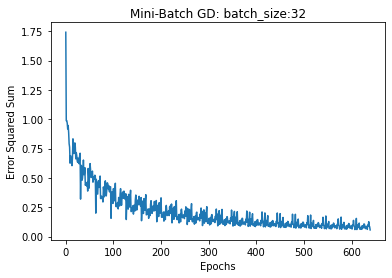

In [6]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.xlabel('Epochs')
plt.ylabel('Error Squared Sum')
plt.title('Mini-Batch GD: batch_size:{}'.format(nn.batch_size))
plt.show()

In [7]:
(X, y), (Xtest, ytest) = joy.load_mnist()
epoch_list = [i for i in np.arange(1, 31, 2)] + [i for i in np.arange(40, 101, 20)]
print('epoch_list =', epoch_list)
self_accuracy = []
test_accuracy = []
for i, e in enumerate(epoch_list):
    print("i = {}/{}, epoch = {}".format(i+1, len(epoch_list), e))
    nn = MnistMiniBatch(784, 100, 10, epochs = e, batch_size = 32)
    nn.fit(X, y)
    self_accuracy.append(nn.evaluate(X, y))
    test_accuracy.append(nn.evaluate(Xtest, ytest))

epoch_list = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 40, 60, 80, 100]
i = 1/19, epoch = 1
i = 2/19, epoch = 3
i = 3/19, epoch = 5
i = 4/19, epoch = 7
i = 5/19, epoch = 9
i = 6/19, epoch = 11
i = 7/19, epoch = 13
i = 8/19, epoch = 15
i = 9/19, epoch = 17
i = 10/19, epoch = 19
i = 11/19, epoch = 21
i = 12/19, epoch = 23
i = 13/19, epoch = 25
i = 14/19, epoch = 27
i = 15/19, epoch = 29
i = 16/19, epoch = 40
i = 17/19, epoch = 60
i = 18/19, epoch = 80
i = 19/19, epoch = 100


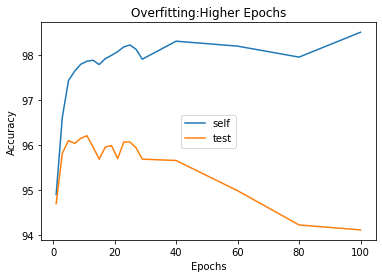

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.plot(epoch_list, self_accuracy, label='self')
plt.plot(epoch_list, test_accuracy, label='test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Overfitting:Higher Epochs'.format(nn.batch_size))
plt.legend(loc='center')
plt.show()

In [9]:
(X, y), (Xtest, ytest) = joy.load_mnist() 
n_h_list = np.linspace(50, 800, 16, dtype=int)
print('n_h_list =', n_h_list) 
self_accuracy = []
test_accuracy = []
for i, n_h in  enumerate(n_h_list):
    print("i = {}/{}, hidden_nodes = {}".format(i+1, len(n_h_list), n_h))
    nn = MnistMiniBatch(784, n_h, 10, epochs = 10, batch_size = 32)  
    nn.fit(X, y)  
    self_accuracy.append(nn.evaluate(X, y))  
    test_accuracy.append(nn.evaluate(Xtest, ytest))

n_h_list = [ 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800]
i = 1/16, hidden_nodes = 50
i = 2/16, hidden_nodes = 100
i = 3/16, hidden_nodes = 150
i = 4/16, hidden_nodes = 200
i = 5/16, hidden_nodes = 250
i = 6/16, hidden_nodes = 300
i = 7/16, hidden_nodes = 350
i = 8/16, hidden_nodes = 400
i = 9/16, hidden_nodes = 450
i = 10/16, hidden_nodes = 500
i = 11/16, hidden_nodes = 550
i = 12/16, hidden_nodes = 600
i = 13/16, hidden_nodes = 650
i = 14/16, hidden_nodes = 700
i = 15/16, hidden_nodes = 750
i = 16/16, hidden_nodes = 800


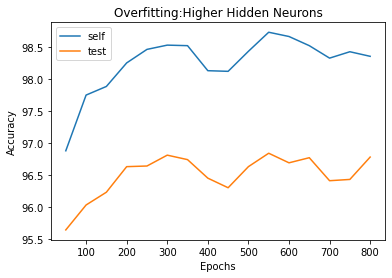

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.plot(n_h_list, self_accuracy, label='self')
plt.plot(n_h_list, test_accuracy, label='test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Overfitting:Higher Hidden Neurons'.format(nn.batch_size))
plt.legend(loc='best')
plt.show()

In [11]:
import joy
(X, y), (Xtest, ytest) = joy.load_mnist()

trainlist = []
testlist = []
w1 = []
w2 = []
for hl in range(40, 810, 10):
    nn = MnistMiniBatch(784, hl, 10, epochs = 20, batch_size = 32)
    nn.fit(X[:1000], y[:1000])
    trainning = nn.evaluate(X[:1000], y[:1000])
    test = nn.evaluate(Xtest[:1000], ytest[:1000])
    
    trainlist.append(round(trainning, 2))
    testlist.append(round(test, 2))
    w1.append(nn.W1)
    w2.append(nn.W2)

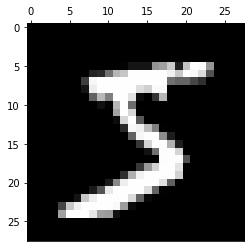

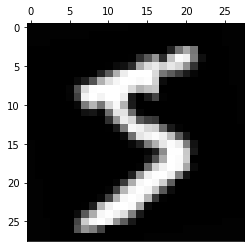

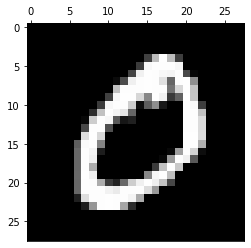

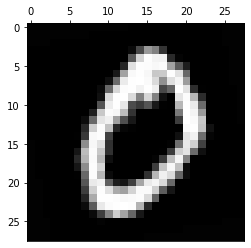

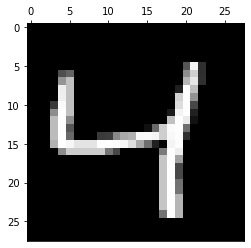

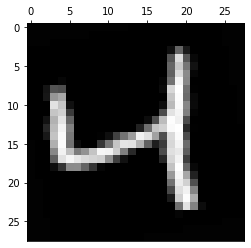

In [12]:
import joy
import scipy
(X, y), (Xtest, ytest) = joy.load_mnist()
for idx in range(0, 3):
    Xr = X[idx].reshape(28, 28)
    joy.show_mnist(Xr)
    Xr = scipy.ndimage.rotate(Xr, 12.0, cval = 0.01, order = 1, reshape = False)
    joy.show_mnist(Xr)

In [14]:
#%%writefile code/MnistMiniBatch.py
#%load code/MnistMiniBatch.py
class MnistMiniBatchGD_Dropout(object):
    """ Mini-batch Gradient Descent with Dropout
    """
    def __init__(self, n_x, n_h, n_y, eta = 0.1, epochs = 100, batch_size = 32, random_seed=1, dropout_ratio=0.5):
        """ 
        """
        self.n_x = n_x
        self.n_h = n_h
        self.n_y = n_y
        self.eta = eta
        self.epochs = epochs
        self.batch_size = batch_size
        np.random.seed(random_seed)
        self.dropout_ratio = dropout_ratio
        self.W1 = 2*np.random.random((self.n_h, self.n_x)) - 1  # between -1 and 1
        self.W2 = 2*np.random.random((self.n_y, self.n_h)) - 1  # between -1 and 1
        #print('W1.shape={}, W2.shape={}'.format(self.W1.shape, self.W2.shape))
        
    def forpass(self, A0, train=True):
        Z1 = np.dot(self.W1, A0)                # hidden layer inputs
        A1 = self.g(Z1)                         # hidden layer outputs/activation func

        # Dropout
        if train:
            self.drop_units = np.random.rand(*A1.shape) > self.dropout_ratio
            A1 = A1 * self.drop_units / self.dropout_ratio
          
        Z2 = np.dot(self.W2, A1)                # output layer inputs
        A2 = self.g(Z2)                         # output layer outputs/activation func
        return Z1, A1, Z2, A2

    def fit(self, X, y):
        """ 
        X: input dataset 
        y: class labels
        """

        self.cost_ = []
        m_samples = len(y)       
        Y = joy.one_hot_encoding(y, self.n_y)       # (m, n_y) = (m, 10)   one-hot encoding
        #print('X.shape={}, y.shape={}, Y.shape={}'.format(X.shape, y.shape, Y.shape))
        
        for epoch in range(self.epochs):
            #print('Training epoch {}/{}.'.format(epoch + 1, self.epochs))
            for i in range(0, m_samples, self.batch_size):
                A0 = X[i: i + self.batch_size].T
                Y0 = Y[i: i + self.batch_size].T
                Z1, A1, Z2, A2 = self.forpass(A0)        

                E2 = Y0 - A2                 
                E1 = np.dot(self.W2.T, E2)       

                # back prop, error prop
                dZ2 = E2 * self.g_prime(Z2)     
                dZ1 = E1 * self.g_prime(Z1)    

                # Dropout
                dZ1 = dZ1 * self.drop_units       

                # update weights
                self.W2 +=  self.eta * np.dot(dZ2, A1.T)     
                self.W1 +=  self.eta * np.dot(dZ1, A0.T)    

                self.cost_.append(np.sqrt(np.sum(E2 * E2)
                                          /self.batch_size))
        return self

    def predict(self, X):
        A0 = np.array(X, ndmin=2).T         # A0: inputs
        Z1, A1, Z2, A2 = self.forpass(A0, train=False)   # forpass
        return A2                                       

    def g(self, x):                             # activation_function: sigmoid
        return 1.0/(1.0+np.exp(-x))
    
    def g_prime(self, x):                    # activation_function: sigmoid derivative
        return self.g(x) * (1 - self.g(x))
    
    def evaluate(self, Xtest, ytest):       
        m_samples = len(ytest)
        scores = 0        
        A2 = self.predict(Xtest)
        yhat = np.argmax(A2, axis = 0)
        scores += np.sum(yhat == ytest)
        return scores/m_samples * 100

In [15]:
import joy
(X, y), (Xtest, ytest) = joy.load_mnist()
nn = MnistMiniBatchGD_Dropout(784, 600, 10, 
            epochs = 40, dropout_ratio = 0.5)
nn.fit(X[:3000], y[:3000])
self = nn.evaluate(X[:3000], y[:3000])
test = nn.evaluate(Xtest[:1000], ytest[:1000])
print('MNIST self accuracy {}%'.format(self))
print('MNIST test accuracy {}%'.format(test))

MNIST self accuracy 99.73333333333333%
MNIST test accuracy 91.7%


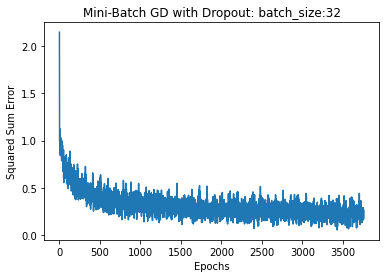

In [16]:
import matplotlib.pyplot as plt

plt.plot(range(len(nn.cost_)), nn.cost_)
plt.xlabel('Epochs')
plt.ylabel('Squared Sum Error')
plt.title('Mini-Batch GD with Dropout: batch_size:{}'.format(nn.batch_size))
plt.show()

In [17]:
def tanh(x):
    return (1.0 - np.exp(-2 * x))/(
            1.0 + np.exp(-2 * x))
def tanh_d(x):
    return (1 + tanh(x)) * (1 - tanh(x))

def sigmoid(x): 
    #x = np.clip(x, -500, 500)  
    return 1 / (1 + np.exp((-x)))

def sigmoid_d(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(x, 0)

def relu_d(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

In [19]:
#%%writefile code/mnistDeepNet.py
#%load code/mnistDeepNet.py
# deep neural net
# version 0.1
# author: idebtor@gmail.com 

import sys
class DeepNeuralNet(object):
    """ implements a deep neural net. 
        Users may specify any number of layers.
        net_arch -- consists of a number of neurons in each layer 
    """
    def __init__(self, net_arch, activate = None, eta = 1.0, epochs = 100, random_seed = 1):
        self.eta = eta
        self.epochs = epochs
        self.net_arch = net_arch
        self.layers = len(net_arch)
        self.W = []
        self.random_seed = random_seed
        
        self.g       = [lambda x: sigmoid(x)   for _ in range(self.layers)]
        self.g_prime = [lambda x: sigmoid_d(x) for _ in range(self.layers)]
        
        if activate is not None:
            for i, (g, g_prime) in enumerate(zip(activate[::2], activate[1::2])):
                self.g[i+1] = g
                self.g_prime[i+1] = g_prime
                
        for i in range(len(self.g)):
            print(type(self.g[i]), id(self.g[i]))
        
        #print('X.shape={}, y.shape{}'.format(X.shape, y.shape))
        # Random initialization with range of weight values (-1,1)
        np.random.seed(self.random_seed)
        
        # A place holder [None] is used to indicated "unused place".
        self.W = [[None]]    ## the first W0 is not used.
        for layer in range(self.layers - 1):
            w = 2 * np.random.rand(self.net_arch[layer+1], 
                                   self.net_arch[layer]) - 1
            print('layer:', layer, 'shape:', w.shape)
            self.W.append(w)  
        print('Weight:', self.W)
            
    def forpass(self, A0):     
        Z = [[None]]   # Z0 is not used.
        A = []       # A0 = X0 is used. 
        A.append(A0)
        for i in range(1, len(self.W)):
            z = np.dot(self.W[i], A[i-1])
            Z.append(z)
            a = self.g[i](z)
            A.append(a)
        return Z, A
    
    def backprop(self, Z, A, Y):
        # initialize empty lists to save E and dZ
        # A place holder None is used to indicated "unused place".
        E  = [None for x in range(self.layers)]
        dZ = [None for x in range(self.layers)]
        
        # Get error at the output layer or the last layer
        ll = self.layers - 1
        error = Y - A[ll]
        E[ll] = error   
        dZ[ll] = error * self.g_prime[ll](Z[ll]) 
        
        # Begin from the back, from the next to last layer
        for i in range(self.layers-2, 0, -1):
            E[i]  = np.dot(self.W[i+1].T, E[i+1])
            dZ[i] = E[i] * self.g_prime[i](Z[i])
       
        # Adjust the weights, using the backpropagation rules
        m = Y.shape[0] # number of samples
        for i in range(ll, 0, -1):
            self.W[i] += self.eta * np.dot(dZ[i], A[i-1].T) / m
        return error
         
    def fit(self, X, y):
        print('fit')
        self.cost_ = []        
        for epoch in range(self.epochs):          
            Z, A = self.forpass(X)        
            cost = self.backprop(Z, A, y)   
            self.cost_.append(
                 np.sqrt(np.sum(cost * cost)))    
        return self

    def predict(self, X):
        print('predict')
        A0 = np.array(X, ndmin=2).T         # A0: inputs
        Z, A = self.forpass(A0)     # forpass
        return A[-1]                                       
   
    def evaluate(self, Xtest, ytest):       # fully vectorized calculation
        print('evaluate')
        m_samples = len(ytest)
        scores = 0        
        A3 = self.predict(Xtest)
        yhat = np.argmax(A3, axis = 0)
        scores += np.sum(yhat == ytest)
        return scores/m_samples * 100
    

<class 'function'> 140720824418512
<class 'function'> 140720824418800
<class 'function'> 140720824418944
<class 'function'> 140720824419088
layer: 0 shape: (4, 2)
layer: 1 shape: (2, 4)
layer: 2 shape: (1, 2)
Weight: [[None], array([[-0.16595599,  0.44064899],
       [-0.99977125, -0.39533485],
       [-0.70648822, -0.81532281],
       [-0.62747958, -0.30887855]]), array([[-0.20646505,  0.07763347, -0.16161097,  0.370439  ],
       [-0.5910955 ,  0.75623487, -0.94522481,  0.34093502]]), array([[-0.1653904 ,  0.11737966]])]
fit
predict


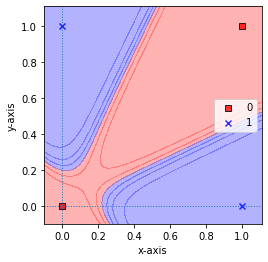

In [20]:
import joy
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

# Set the input data and labels for XOR
X = np.array([ [0, 0, 1, 1], [0, 1, 0, 1] ])
y = np.array([0, 1, 1, 0])

# Initialize the deep neural net with
dnn = DeepNeuralNet([2, 4, 2, 1], eta = 0.5, epochs = 5000)  

# training the deep neural net objcet with X, y
dnn.fit(X, y)             

joy.plot_decision_regions(X.T, y, dnn)   
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='best')
plt.show()

<class 'function'> 140722868157456
<class 'function'> 140722868157600
<class 'function'> 140722868157024
layer: 0 shape: (4, 2)
layer: 1 shape: (1, 4)
Weight: [[None], array([[-0.16595599,  0.44064899],
       [-0.99977125, -0.39533485],
       [-0.70648822, -0.81532281],
       [-0.62747958, -0.30887855]]), array([[-0.20646505,  0.07763347, -0.16161097,  0.370439  ]])]
fit


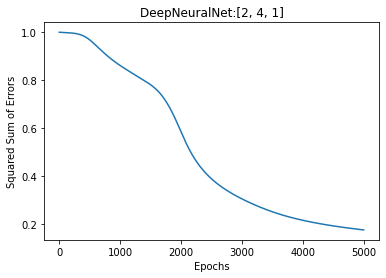

In [21]:
dnn = DeepNeuralNet([2, 4, 1], 
                    eta = 0.5, epochs = 5000).fit(X, y) 
plt.plot(range(len(dnn.cost_)), dnn.cost_)
plt.xlabel('Epochs')
plt.ylabel('Squared Sum of Errors')
plt.title('DeepNeuralNet:{}'.format(dnn.net_arch))
plt.show()

<class 'function'> 140720834185968
<class 'function'> 140720834184672
<class 'function'> 140720834184960
layer: 0 shape: (4, 2)
layer: 1 shape: (1, 4)
Weight: [[None], array([[-0.16595599,  0.44064899],
       [-0.99977125, -0.39533485],
       [-0.70648822, -0.81532281],
       [-0.62747958, -0.30887855]]), array([[-0.20646505,  0.07763347, -0.16161097,  0.370439  ]])]
fit
<class 'function'> 140720828109872
<class 'function'> 140722867936704
<class 'function'> 140722867936704
<class 'function'> 140722867936704
layer: 0 shape: (4, 2)
layer: 1 shape: (2, 4)
layer: 2 shape: (1, 2)
Weight: [[None], array([[-0.16595599,  0.44064899],
       [-0.99977125, -0.39533485],
       [-0.70648822, -0.81532281],
       [-0.62747958, -0.30887855]]), array([[-0.20646505,  0.07763347, -0.16161097,  0.370439  ],
       [-0.5910955 ,  0.75623487, -0.94522481,  0.34093502]]), array([[-0.1653904 ,  0.11737966]])]
fit


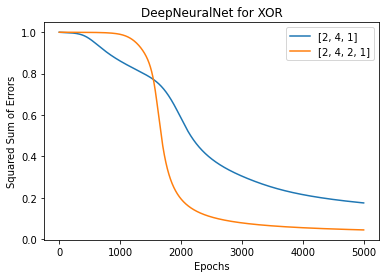

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = np.array([ [0, 0, 1, 1], [0, 1, 0, 1] ])
y = np.array([0, 1, 1, 0])

dnn1 = DeepNeuralNet([2,4,1], eta = 0.5, epochs = 5000).fit(X, y) 

g = [sigmoid, sigmoid_d, sigmoid, sigmoid_d, sigmoid, sigmoid_d]
dnn2 = DeepNeuralNet([2,4,2,1], activate=g, eta = 0.5, epochs = 5000).fit(X, y) 
plt.plot(range(len(dnn1.cost_)), dnn1.cost_, label='{}'.format(dnn1.net_arch))
plt.plot(range(len(dnn2.cost_)), dnn2.cost_, label='{}'.format(dnn2.net_arch))
plt.title('DeepNeuralNet for XOR')
plt.xlabel('Epochs')
plt.ylabel('Squared Sum of Errors')
plt.legend(loc='best')
plt.show()

<class 'function'> 140720847797552
<class 'function'> 140720847797696
<class 'function'> 140720847795680
layer: 0 shape: (4, 2)
layer: 1 shape: (1, 4)
Weight: [[None], array([[-0.16595599,  0.44064899],
       [-0.99977125, -0.39533485],
       [-0.70648822, -0.81532281],
       [-0.62747958, -0.30887855]]), array([[-0.20646505,  0.07763347, -0.16161097,  0.370439  ]])]
fit
<class 'function'> 140720845121280
<class 'function'> 140722867936704
<class 'function'> 140722867936704
<class 'function'> 140722867937136
layer: 0 shape: (3, 2)
layer: 1 shape: (2, 3)
layer: 2 shape: (1, 2)
Weight: [[None], array([[-0.16595599,  0.44064899],
       [-0.99977125, -0.39533485],
       [-0.70648822, -0.81532281]]), array([[-0.62747958, -0.30887855, -0.20646505],
       [ 0.07763347, -0.16161097,  0.370439  ]]), array([[-0.5910955 ,  0.75623487]])]
fit
<class 'function'> 140720834185968
<class 'function'> 140722867936704
<class 'function'> 140722867936704
<class 'function'> 140722867937136
layer: 0 sh

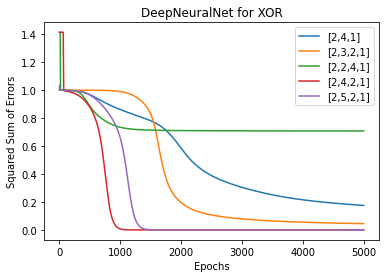

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = np.array([ [0, 0, 1, 1], [0, 1, 0, 1] ])
y = np.array([0, 1, 1, 0])

dnn1 = DeepNeuralNet([2,4,1], eta = 0.5, epochs = 5000).fit(X, y) 
dnn2 = DeepNeuralNet([2,3,2,1], activate=g2, eta = 0.5, epochs = 5000).fit(X, y) 
dnn3 = DeepNeuralNet([2,2,4,1], activate=g2, eta = 0.5, epochs = 5000).fit(X, y) 
dnn4 = DeepNeuralNet([2,4,2,1], activate=g2, eta = 0.5, epochs = 5000).fit(X, y) 
dnn5 = DeepNeuralNet([2,5,2,1], activate=g2, eta = 0.5, epochs = 5000).fit(X, y) 

g = [sigmoid, sigmoid_d, sigmoid, sigmoid_d, sigmoid, sigmoid_d]
g2 = [sigmoid, sigmoid_d, sigmoid, sigmoid_d, relu, relu_d]

dnn2 = DeepNeuralNet([2,4,2,1], activate=g, eta = 0.5, epochs = 5000).fit(X, y) 
plt.plot(range(len(dnn1.cost_)), dnn1.cost_, label='[2,4,1]')
plt.plot(range(len(dnn2.cost_)), dnn2.cost_, label='[2,3,2,1]')
plt.plot(range(len(dnn3.cost_)), dnn3.cost_, label='[2,2,4,1]')
plt.plot(range(len(dnn4.cost_)), dnn4.cost_, label='[2,4,2,1]')
plt.plot(range(len(dnn5.cost_)), dnn5.cost_, label='[2,5,2,1]')
plt.title('DeepNeuralNet for XOR')
plt.xlabel('Epochs')
plt.ylabel('Squared Sum of Errors')
plt.legend(loc='best')
plt.show()